In [186]:
#Este script é para cortar as imagens com labels lixo


In [187]:
import os
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 


In [188]:
nomes_comidas = [
    [
        1, "Frango com \nbatata"
    ],
    [
        2, "Bife com  \narroz"
    ],
    [
        3, "Pescada \ncozida"
    ],
    [
        4, "Francezinha"
    ],
    [
        5, "Hamburger"
    ],


    [
        6, "Água"
    ],
    [
        7, "Sumo"
    ],
    [
        8, "Coca-cola"
    ],
    [
        9, "Água com gás"
    ],
    [
        10, "Cerveja"
    ],
    [
        11, "Fim"
    ]
]


In [189]:
imgs = os.listdir(".")
imgs.remove("crop")
imgs.remove("conv.ipynb")

imgs.sort(key=lambda s: len(s))
num_imgs = len(imgs)

In [190]:
imgs

['1.png',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 '10.png',
 'FIM.png']

In [191]:
font = ImageFont.truetype("arial.ttf", 85)
width, height = 0,0

for idx, cam_img in enumerate(imgs):
    
    
    img_or = Image.open(cam_img)

    width, height = img_or.size#widht lado   height altura
    
    left = 0
    top = 0
    right = width
    
    bottom = width
    img_total = Image.new(mode="RGB", size=(width, height), color=(255,255,255))
    
    img_p = img_or.crop((left, top, right, bottom))
    
    img_total.paste(img_p, (0, 0))

    draw = ImageDraw.Draw(img_total)
        
        
    draw.text((20, width),   nomes_comidas[idx][1],  (100,0,255),   font=font)
    
    img_total.save("crop//" + cam_img)


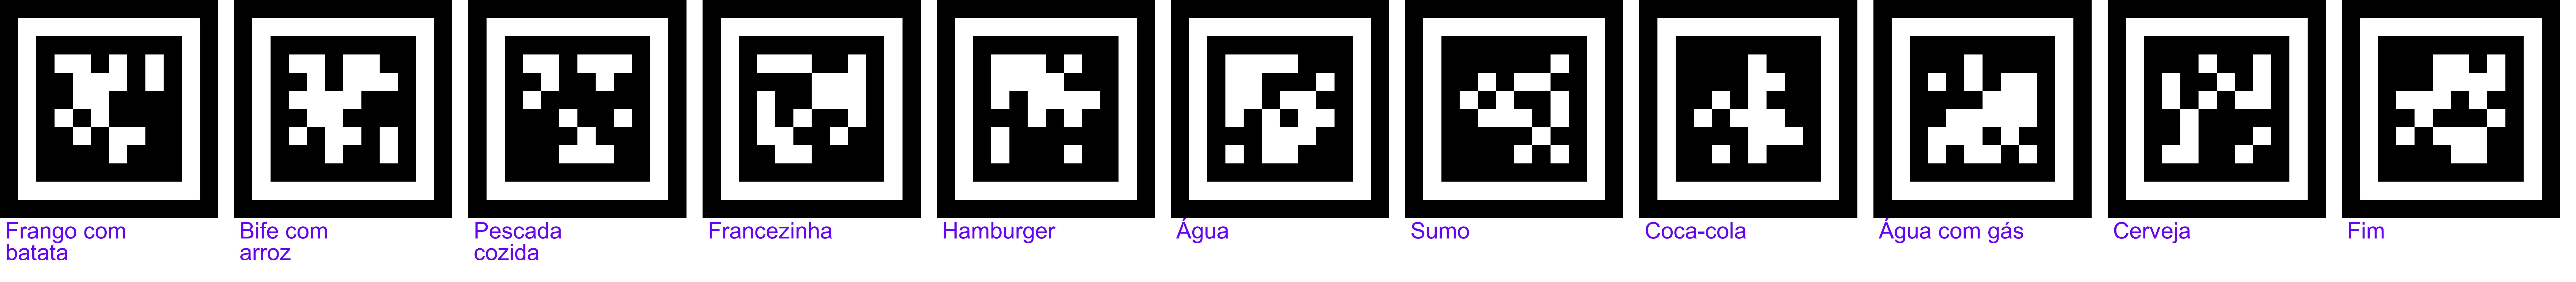

In [192]:
imgs_com_crop = os.listdir("./crop")



tam_espaco = 60
widht_total = (width * num_imgs) + (tam_espaco * num_imgs)#Comprimento de uma imagem mais o espaco da imagem

img_total = Image.new(mode="RGB", size=(widht_total, height), color=(255,255,255))

imgs_com_crop.sort(key=lambda s: len(s))

for idx, cam_img in enumerate(imgs_com_crop):
    
    img = Image.open("crop/" + cam_img)
    
    img_total.paste(img, ((width * idx) + (tam_espaco * idx), 0))

img_total


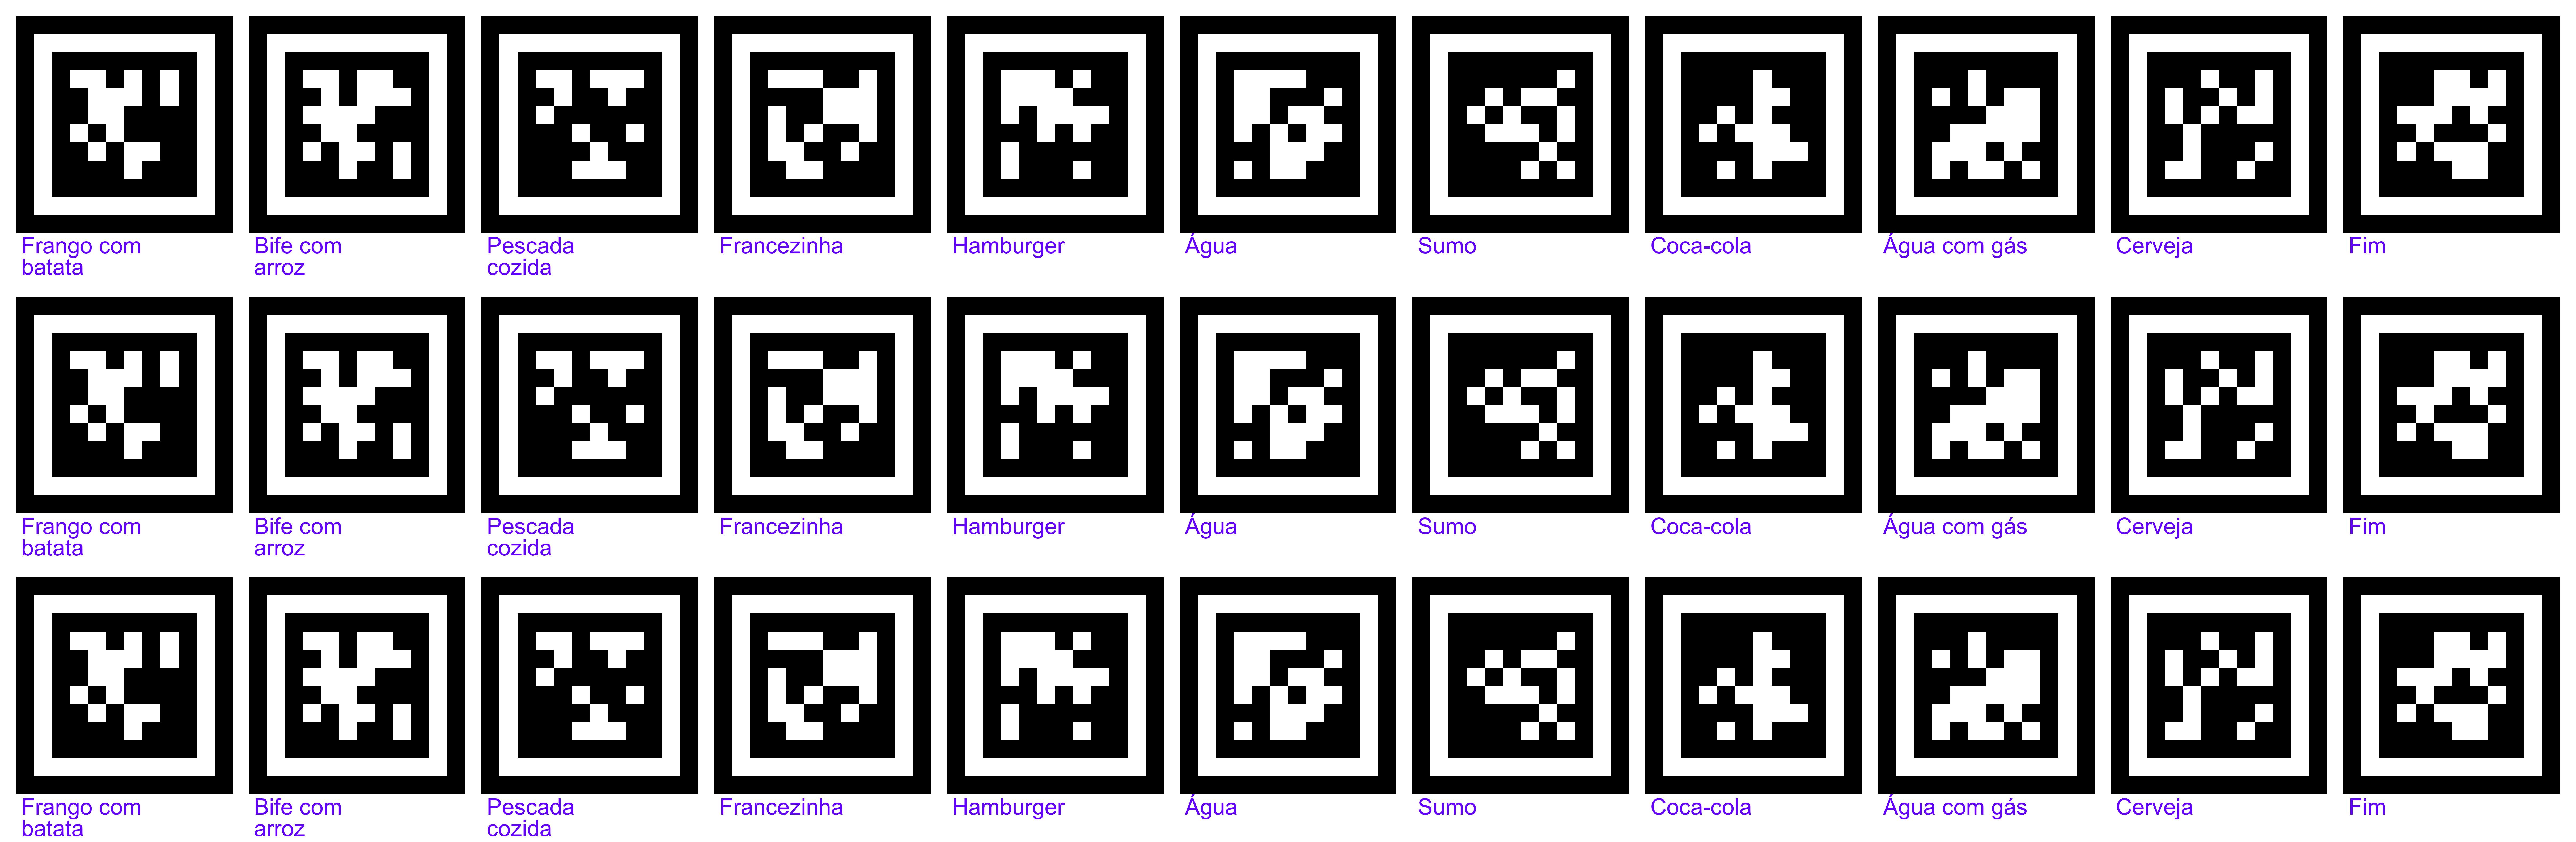

In [193]:
img_grande= Image.new(mode="RGB", size=(widht_total + tam_espaco, height * 3), color=(255,255,255))
img_grande.paste(img_total, (tam_espaco, (height * 0)+ tam_espaco) )
img_grande.paste(img_total, (tam_espaco, (height * 1)+ tam_espaco) )
img_grande.paste(img_total, (tam_espaco, (height * 2)+ tam_espaco) )

img_grande.save("../todos.png")
img_total.save("../um.png")

img_grande